# Task 1

We first implement the required libraries.

PS: Preprocessing steps are completed in Excel, and seperate datasets for each task is uploaded into the Github.

In [1]:
import os
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.filterwarnings("ignore")

Then, we locate our file. Lag values are provided in seperate excel files in order to track properly. 

In [2]:

os.chdir('/Users/yunusutaro/Desktop/Hw 3')
xls = pd.ExcelFile('Data_Task_A.xls')
dataset = pd.read_excel('Data_Task_A.xls', sheetname="Main")
task1_48  = pd.read_excel('Data_Task_A.xls', sheetname="Task1_48")
task1_168 = pd.read_excel('Data_Task_A.xls', sheetname="Task1_168")

test = dataset.iloc[ 33576:, 2].values

task1_48_pred = task1_48.iloc[ 33528:, 2 ].values
task1_168_pred = task1_168.iloc[ 33408:, 2 ].values



We define our Mape Function.

In [3]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Then, we calculate the MAPE values for Naive approach. As seen, taking the consumption values of last week results in better predictions, as MAPE is lower.

In [4]:
task1_48_mape = mape(test, task1_48_pred)
task1_168_mape = mape(test, task1_168_pred)

print(task1_48_mape, task1_168_mape)

8.126847983328357 2.8918686527943787


# Task 2

Data preprocessing is completed in a seperate excel file. After the file is uploaded, train and test sets will be defined.

In [5]:
task2_data = pd.read_excel('Data_Task2.xls', sheetname="Sheet0")

task2_x_train = task2_data.iloc[:33408, 2:5].values
task2_y_train = task2_data.iloc[:33408,  5].values


task2_x_test = task2_data.iloc[33408:, 2:5].values


For visualization, we display our dataframe:

In [7]:
task2_data

,Tarih,Saat,Intercept,Lag_48,Lag_168,Tüketim Miktarı (MWh)
0,08.01.2016,00:00,1,29189.27,26277.24,28602.02
1,08.01.2016,01:00,1,27614.02,24991.82,27112.37
2,08.01.2016,02:00,1,26578.97,23532.61,25975.34
3,08.01.2016,03:00,1,25719.19,22464.78,25315.55
4,08.01.2016,04:00,1,25864.63,22002.91,25128.15
5,08.01.2016,05:00,1,25918.59,21957.08,25356.22
6,08.01.2016,06:00,1,27091.94,22203.54,26338.72
7,08.01.2016,07:00,1,28533.05,21844.16,28086.42
8,08.01.2016,08:00,1,33203.34,23094.73,32702.24
9,08.01.2016,09:00,1,36257.22,25202.27,35788.17


Then, we fit linear regression into this dataset.

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(task2_x_train, task2_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

After fitting, we use predict function to get forecasted values in the test set:

In [12]:
task2_mape = mape(test, task2_pred)
task2_mape

4.150260145419525

As seen above, fitting linear regression into dataset within given 4.15% error. It is better than using Naive approach wih 48-hour-lag values and worse than using Naive approach with 168-hour-lag values.

# Task 3

In a seperate Excel file, datasets for each hour are generated. The block below imports these datasets, fits linear regression, predicts from the test set features and calculates MAPE for each hour.

In [13]:

task3_hour_0 = pd.read_excel('Data_Task3.xls', sheetname="Hour0")
task3_hour_1 = pd.read_excel('Data_Task3.xls', sheetname="Hour1")
task3_hour_2 = pd.read_excel('Data_Task3.xls', sheetname="Hour2")
task3_hour_3 = pd.read_excel('Data_Task3.xls', sheetname="Hour3")
task3_hour_4 = pd.read_excel('Data_Task3.xls', sheetname="Hour4")
task3_hour_5 = pd.read_excel('Data_Task3.xls', sheetname="Hour5")
task3_hour_6 = pd.read_excel('Data_Task3.xls', sheetname="Hour6")
task3_hour_7 = pd.read_excel('Data_Task3.xls', sheetname="Hour7")
task3_hour_8 = pd.read_excel('Data_Task3.xls', sheetname="Hour8")
task3_hour_9 = pd.read_excel('Data_Task3.xls', sheetname="Hour9")
task3_hour_10 = pd.read_excel('Data_Task3.xls', sheetname="Hour10")
task3_hour_11 = pd.read_excel('Data_Task3.xls', sheetname="Hour11")
task3_hour_12 = pd.read_excel('Data_Task3.xls', sheetname="Hour12")
task3_hour_13 = pd.read_excel('Data_Task3.xls', sheetname="Hour13")
task3_hour_14 = pd.read_excel('Data_Task3.xls', sheetname="Hour14")
task3_hour_15 = pd.read_excel('Data_Task3.xls', sheetname="Hour15")
task3_hour_16 = pd.read_excel('Data_Task3.xls', sheetname="Hour16")
task3_hour_17 = pd.read_excel('Data_Task3.xls', sheetname="Hour17")
task3_hour_18 = pd.read_excel('Data_Task3.xls', sheetname="Hour18")
task3_hour_19 = pd.read_excel('Data_Task3.xls', sheetname="Hour19")
task3_hour_20 = pd.read_excel('Data_Task3.xls', sheetname="Hour20")
task3_hour_21 = pd.read_excel('Data_Task3.xls', sheetname="Hour21")
task3_hour_22 = pd.read_excel('Data_Task3.xls', sheetname="Hour22")
task3_hour_23 = pd.read_excel('Data_Task3.xls', sheetname="Hour23")


task3_0_x_train = task3_hour_0.iloc[:1392, 2:5].values
task3_0_y_train = task3_hour_0.iloc[:1392,  5].values
task3_0_x_test  = task3_hour_0.iloc[1392:, 2:5].values
task3_0_y_test = task3_hour_0.iloc[1392:, 5].values


task3_1_x_train = task3_hour_1.iloc[:1392, 2:5].values
task3_1_y_train = task3_hour_1.iloc[:1392,  5].values
task3_1_x_test  = task3_hour_1.iloc[1392:, 2:5].values
task3_1_y_test = task3_hour_1.iloc[1392:, 5].values



task3_2_x_train = task3_hour_2.iloc[:1392, 2:5].values
task3_2_y_train = task3_hour_2.iloc[:1392,  5].values
task3_2_x_test  = task3_hour_2.iloc[1392:, 2:5].values
task3_2_y_test = task3_hour_2.iloc[1392:, 5].values



task3_3_x_train = task3_hour_3.iloc[:1392, 2:5].values
task3_3_y_train = task3_hour_3.iloc[:1392,  5].values
task3_3_x_test  = task3_hour_3.iloc[1392:, 2:5].values
task3_3_y_test = task3_hour_3.iloc[1392:, 5].values



task3_4_x_train = task3_hour_4.iloc[:1392, 2:5].values
task3_4_y_train = task3_hour_4.iloc[:1392,  5].values
task3_4_x_test  = task3_hour_4.iloc[1392:, 2:5].values
task3_4_y_test = task3_hour_4.iloc[1392:, 5].values



task3_5_x_train = task3_hour_5.iloc[:1392, 2:5].values
task3_5_y_train = task3_hour_5.iloc[:1392,  5].values
task3_5_x_test  = task3_hour_5.iloc[1392:, 2:5].values
task3_5_y_test = task3_hour_5.iloc[1392:, 5].values



task3_6_x_train = task3_hour_6.iloc[:1392, 2:5].values
task3_6_y_train = task3_hour_6.iloc[:1392,  5].values
task3_6_x_test  = task3_hour_6.iloc[1392:, 2:5].values
task3_6_y_test = task3_hour_6.iloc[1392:, 5].values



task3_7_x_train = task3_hour_7.iloc[:1392, 2:5].values
task3_7_y_train = task3_hour_7.iloc[:1392,  5].values
task3_7_x_test  = task3_hour_7.iloc[1392:, 2:5].values
task3_7_y_test = task3_hour_7.iloc[1392:, 5].values



task3_8_x_train = task3_hour_8.iloc[:1392, 2:5].values
task3_8_y_train = task3_hour_8.iloc[:1392,  5].values
task3_8_x_test  = task3_hour_8.iloc[1392:, 2:5].values
task3_8_y_test = task3_hour_8.iloc[1392:, 5].values



task3_9_x_train = task3_hour_9.iloc[:1392, 2:5].values
task3_9_y_train = task3_hour_9.iloc[:1392,  5].values
task3_9_x_test  = task3_hour_9.iloc[1392:, 2:5].values
task3_9_y_test = task3_hour_9.iloc[1392:, 5].values



task3_10_x_train = task3_hour_10.iloc[:1392, 2:5].values
task3_10_y_train = task3_hour_10.iloc[:1392,  5].values
task3_10_x_test  = task3_hour_10.iloc[1392:, 2:5].values
task3_10_y_test = task3_hour_10.iloc[1392:, 5].values



task3_11_x_train = task3_hour_11.iloc[:1392, 2:5].values
task3_11_y_train = task3_hour_11.iloc[:1392,  5].values
task3_11_x_test  = task3_hour_11.iloc[1392:, 2:5].values
task3_11_y_test = task3_hour_11.iloc[1392:, 5].values



task3_12_x_train = task3_hour_12.iloc[:1392, 2:5].values
task3_12_y_train = task3_hour_12.iloc[:1392,  5].values
task3_12_x_test  = task3_hour_12.iloc[1392:, 2:5].values
task3_12_y_test = task3_hour_12.iloc[1392:, 5].values



task3_13_x_train = task3_hour_13.iloc[:1392, 2:5].values
task3_13_y_train = task3_hour_13.iloc[:1392,  5].values
task3_13_x_test  = task3_hour_13.iloc[1392:, 2:5].values
task3_13_y_test = task3_hour_13.iloc[1392:, 5].values



task3_14_x_train = task3_hour_14.iloc[:1392, 2:5].values
task3_14_y_train = task3_hour_14.iloc[:1392,  5].values
task3_14_x_test  = task3_hour_14.iloc[1392:, 2:5].values
task3_14_y_test = task3_hour_14.iloc[1392:, 5].values



task3_15_x_train = task3_hour_15.iloc[:1392, 2:5].values
task3_15_y_train = task3_hour_15.iloc[:1392,  5].values
task3_15_x_test  = task3_hour_15.iloc[1392:, 2:5].values
task3_15_y_test = task3_hour_15.iloc[1392:, 5].values



task3_16_x_train = task3_hour_16.iloc[:1392, 2:5].values
task3_16_y_train = task3_hour_16.iloc[:1392,  5].values
task3_16_x_test  = task3_hour_16.iloc[1392:, 2:5].values
task3_16_y_test = task3_hour_16.iloc[1392:, 5].values



task3_17_x_train = task3_hour_17.iloc[:1392, 2:5].values
task3_17_y_train = task3_hour_17.iloc[:1392,  5].values
task3_17_x_test  = task3_hour_17.iloc[1392:, 2:5].values
task3_17_y_test = task3_hour_17.iloc[1392:, 5].values



task3_18_x_train = task3_hour_18.iloc[:1392, 2:5].values
task3_18_y_train = task3_hour_18.iloc[:1392,  5].values
task3_18_x_test  = task3_hour_18.iloc[1392:, 2:5].values
task3_18_y_test = task3_hour_18.iloc[1392:, 5].values



task3_19_x_train = task3_hour_19.iloc[:1392, 2:5].values
task3_19_y_train = task3_hour_19.iloc[:1392,  5].values
task3_19_x_test  = task3_hour_19.iloc[1392:, 2:5].values
task3_19_y_test = task3_hour_19.iloc[1392:, 5].values



task3_20_x_train = task3_hour_20.iloc[:1392, 2:5].values
task3_20_y_train = task3_hour_20.iloc[:1392,  5].values
task3_20_x_test  = task3_hour_20.iloc[1392:, 2:5].values
task3_20_y_test = task3_hour_20.iloc[1392:, 5].values



task3_21_x_train = task3_hour_21.iloc[:1392, 2:5].values
task3_21_y_train = task3_hour_21.iloc[:1392,  5].values
task3_21_x_test  = task3_hour_21.iloc[1392:, 2:5].values
task3_21_y_test = task3_hour_21.iloc[1392:, 5].values



task3_22_x_train = task3_hour_22.iloc[:1392, 2:5].values
task3_22_y_train = task3_hour_22.iloc[:1392,  5].values
task3_22_x_test  = task3_hour_22.iloc[1392:, 2:5].values
task3_22_y_test = task3_hour_22.iloc[1392:, 5].values



task3_23_x_train = task3_hour_23.iloc[:1392, 2:5].values
task3_23_y_train = task3_hour_23.iloc[:1392,  5].values
task3_23_x_test  = task3_hour_23.iloc[1392:, 2:5].values
task3_23_y_test = task3_hour_23.iloc[1392:, 5].values



reg.fit(task3_0_x_train, task3_0_y_train)
task3_0_pred = reg.predict(task3_0_x_test)
task3_0_mape = mape(task3_0_y_test, task3_0_pred)



reg.fit(task3_1_x_train, task3_1_y_train)
task3_1_pred = reg.predict(task3_1_x_test)
task3_1_mape = mape(task3_1_y_test, task3_1_pred)


reg.fit(task3_2_x_train, task3_2_y_train)
task3_2_pred = reg.predict(task3_2_x_test)
task3_2_mape = mape(task3_2_y_test, task3_2_pred)


reg.fit(task3_3_x_train, task3_3_y_train)
task3_3_pred = reg.predict(task3_3_x_test)
task3_3_mape = mape(task3_3_y_test, task3_3_pred)


reg.fit(task3_4_x_train, task3_4_y_train)
task3_4_pred = reg.predict(task3_4_x_test)
task3_4_mape = mape(task3_4_y_test, task3_4_pred)


reg.fit(task3_5_x_train, task3_5_y_train)
task3_5_pred = reg.predict(task3_5_x_test)
task3_5_mape = mape(task3_5_y_test, task3_5_pred)


reg.fit(task3_6_x_train, task3_6_y_train)
task3_6_pred = reg.predict(task3_6_x_test)
task3_6_mape = mape(task3_6_y_test, task3_6_pred)


reg.fit(task3_7_x_train, task3_7_y_train)
task3_7_pred = reg.predict(task3_7_x_test)
task3_7_mape = mape(task3_7_y_test, task3_7_pred)


reg.fit(task3_8_x_train, task3_8_y_train)
task3_8_pred = reg.predict(task3_8_x_test)
task3_8_mape = mape(task3_8_y_test, task3_8_pred)

reg.fit(task3_9_x_train, task3_9_y_train)
task3_9_pred = reg.predict(task3_9_x_test)
task3_9_mape = mape(task3_9_y_test, task3_9_pred)

reg.fit(task3_10_x_train, task3_10_y_train)
task3_10_pred = reg.predict(task3_10_x_test)
task3_10_mape = mape(task3_10_y_test, task3_10_pred)

reg.fit(task3_11_x_train, task3_11_y_train)
task3_11_pred = reg.predict(task3_11_x_test)
task3_11_mape = mape(task3_11_y_test, task3_11_pred)

reg.fit(task3_12_x_train, task3_12_y_train)
task3_12_pred = reg.predict(task3_12_x_test)
task3_12_mape = mape(task3_12_y_test, task3_12_pred)

reg.fit(task3_13_x_train, task3_13_y_train)
task3_13_pred = reg.predict(task3_13_x_test)
task3_13_mape = mape(task3_13_y_test, task3_13_pred)

reg.fit(task3_14_x_train, task3_14_y_train)
task3_14_pred = reg.predict(task3_14_x_test)
task3_14_mape = mape(task3_14_y_test, task3_14_pred)

reg.fit(task3_15_x_train, task3_15_y_train)
task3_15_pred = reg.predict(task3_15_x_test)
task3_15_mape = mape(task3_15_y_test, task3_15_pred)

reg.fit(task3_16_x_train, task3_16_y_train)
task3_16_pred = reg.predict(task3_16_x_test)
task3_16_mape = mape(task3_16_y_test, task3_16_pred)

reg.fit(task3_17_x_train, task3_17_y_train)
task3_17_pred = reg.predict(task3_17_x_test)
task3_17_mape = mape(task3_17_y_test, task3_17_pred)

reg.fit(task3_18_x_train, task3_18_y_train)
task3_18_pred = reg.predict(task3_18_x_test)
task3_18_mape = mape(task3_18_y_test, task3_18_pred)

reg.fit(task3_19_x_train, task3_19_y_train)
task3_19_pred = reg.predict(task3_19_x_test)
task3_19_mape = mape(task3_19_y_test, task3_19_pred)

reg.fit(task3_20_x_train, task3_20_y_train)
task3_20_pred = reg.predict(task3_20_x_test)
task3_20_mape = mape(task3_20_y_test, task3_20_pred)

reg.fit(task3_21_x_train, task3_0_y_train)
task3_21_pred = reg.predict(task3_21_x_test)
task3_21_mape = mape(task3_21_y_test, task3_21_pred)

reg.fit(task3_22_x_train, task3_22_y_train)
task3_22_pred = reg.predict(task3_22_x_test)
task3_22_mape = mape(task3_22_y_test, task3_22_pred)

reg.fit(task3_23_x_train, task3_23_y_train)
task3_23_pred = reg.predict(task3_23_x_test)
task3_23_mape = mape(task3_23_y_test, task3_23_pred)


Now, we will display the MAPE values for each hour for commenting purposes.

In [15]:
print("Hour 0 MAPE is:", task3_0_mape)
print("Hour 1 MAPE is:", task3_1_mape)
print("Hour 2 MAPE is:", task3_2_mape)
print("Hour 3 MAPE is:", task3_3_mape)
print("Hour 4 MAPE is:", task3_4_mape)
print("Hour 5 MAPE is:", task3_5_mape)
print("Hour 6 MAPE is:", task3_6_mape)
print("Hour 7 MAPE is:", task3_7_mape)
print("Hour 8 MAPE is:", task3_8_mape)
print("Hour 9 MAPE is:", task3_9_mape)
print("Hour 10 MAPE is:", task3_10_mape)
print("Hour 11 MAPE is:", task3_11_mape)
print("Hour 12 MAPE is:", task3_12_mape)
print("Hour 13 MAPE is:", task3_13_mape)
print("Hour 14 MAPE is:", task3_14_mape)
print("Hour 15 MAPE is:", task3_15_mape)
print("Hour 16 MAPE is:", task3_16_mape)
print("Hour 17 MAPE is:", task3_17_mape)
print("Hour 18 MAPE is:", task3_18_mape)
print("Hour 19 MAPE is:", task3_19_mape)
print("Hour 20 MAPE is:", task3_20_mape)
print("Hour 21 MAPE is:", task3_21_mape)
print("Hour 22 MAPE is:", task3_22_mape)
print("Hour 22 MAPE is:", task3_22_mape)
print("Hour 23 MAPE is:", task3_23_mape)


Hour 0 MAPE is: 3.1973275720611998
Hour 1 MAPE is: 3.436482648188377
Hour 2 MAPE is: 3.4627671158685938
Hour 3 MAPE is: 3.4162558868486474
Hour 4 MAPE is: 3.336996118573225
Hour 5 MAPE is: 3.340161116840354
Hour 6 MAPE is: 3.594191034635774
Hour 7 MAPE is: 4.091737127175361
Hour 8 MAPE is: 4.741452928702325
Hour 9 MAPE is: 5.013485358615847
Hour 10 MAPE is: 5.192033853197255
Hour 11 MAPE is: 5.481133565670347
Hour 12 MAPE is: 5.6020895362341685
Hour 13 MAPE is: 5.9528145102752195
Hour 14 MAPE is: 6.3460954295001955
Hour 15 MAPE is: 6.0627849751812155
Hour 16 MAPE is: 5.32046392063819
Hour 17 MAPE is: 4.6283492570565885
Hour 18 MAPE is: 3.7232526034997186
Hour 19 MAPE is: 3.3322075331672307
Hour 20 MAPE is: 3.262900105178093
Hour 21 MAPE is: 11.942057102746517
Hour 22 MAPE is: 3.267538594471178
Hour 22 MAPE is: 3.267538594471178
Hour 23 MAPE is: 3.3038338011446187


As seen from the results above; the best results are obtained for hour 0 and the worst results are obtained from Hour 21. Compared to the previous approaches, for most of the hours it is successful compared to forecasting as a whole. Nevertheless, in several hours, the accuracy drops. Thus, it is advisable to use this method for some hours.

# Task 4

I have generated an Excel file containing about the lag values of 168 and 48 hours before. After uploading the xls file, we will transform it using Numpy.Reshape function and get the feature set after appending.

In [16]:
lag_values_168 = pd.read_excel('lags.xls', sheetname="168").values
lag_values_48 = pd.read_excel('lags.xls', sheetname="48").values

lag_values_168 = np.reshape(lag_values_168, (1412,24))
lag_values_48 = np.reshape(lag_values_48, (1412,24))


lag_168_train = lag_values_168[:1392, :]
lag_168_test =  lag_values_168[1392:, :]

lag_48_train = lag_values_48[:1392, :]
lag_48_test =  lag_values_48[1392:, :]


task4_train_features = np.append(lag_168_train, lag_48_train, axis = 1)
task4_test_features = np.append(lag_168_test, lag_48_test, axis = 1)


For display purposes;

In [17]:
task4_train_features

array([[26277.24, 24991.82, 23532.61, ..., 33400.82, 33359.37, 31629.97],
       [26224.6 , 24708.58, 23771.58, ..., 32931.12, 32913.06, 31450.65],
       [27613.96, 25779.28, 24566.31, ..., 32638.14, 32739.98, 31092.87],
       ...,
       [29195.12, 27677.44, 26826.76, ..., 32309.83, 31391.48, 29833.08],
       [29265.74, 27902.58, 27211.54, ..., 30119.7 , 28839.74, 27770.37],
       [29351.46, 28195.  , 27269.71, ..., 30864.56, 29650.34, 28315.54]])

Then, we insert required libraries for using Lasso. Additionally, we set our Numpy and Python Core seeds to a same number, for reproducibility purposes.

In [18]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import random as rn

np.random.seed(42)
rn.seed(42)

Then, we define our Grid. 10-Fold Cv will be used with Grid Search. Our grid only contains alpha values as tuned parameters. 30 different alpha values, between 0.0001 and 0.316 will be used in this grid search.

In [104]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_0_y_train)



GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([1.00000e-04, 1.32035e-04, 1.74333e-04, 2.30181e-04, 3.03920e-04,
       4.01281e-04, 5.29832e-04, 6.99564e-04, 9.23671e-04, 1.21957e-03,
       1.61026e-03, 2.12611e-03, 2.80722e-03, 3.70651e-03, 4.89390e-03,
       6.46167e-03, 8.53168e-03, 1.12648e-02, 1.48735e-02, 1.96383e-02,
       2.59294e-02, 3.42360e-02, 4.52035e-02, 5.96846e-02, 7.88046e-02,
       1.04050e-01, 1.37382e-01, 1.81393e-01, 2.39503e-01, 3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

Then, we get the best alpha value, as the result of the grid search.

In [105]:
clf.best_params_

{'alpha': 0.31622776601683794}

Then, we fit Lasso with this result:

In [106]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_0_y_train)

Lasso(alpha=0.316, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Then, we predict:

In [107]:
t4_h0_pred = lasso.predict(task4_test_features)

And calculate the Mape.

In [108]:
task4_hour0_mape = mape(task3_0_y_test, t4_h0_pred)

Then, we complete this procedure for all hours.

In [109]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_1_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [110]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_1_y_train)
t4_h1_pred = lasso.predict(task4_test_features)
task4_hour1_mape = mape(task3_1_y_test, t4_h1_pred)

In [111]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_2_y_train)
clf.best_params_

{'alpha': 0.0001}

In [112]:
lasso = Lasso(alpha=0.0001)
lasso.fit(task4_train_features, task3_2_y_train)
t4_h2_pred = lasso.predict(task4_test_features)
task4_hour2_mape = mape(task3_2_y_test, t4_h2_pred)

In [113]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_3_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [114]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_3_y_train)
t4_h3_pred = lasso.predict(task4_test_features)
task4_hour3_mape = mape(task3_3_y_test, t4_h3_pred)

In [115]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_4_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [116]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_4_y_train)
t4_h4_pred = lasso.predict(task4_test_features)
task4_hour4_mape = mape(task3_4_y_test, t4_h4_pred)

In [117]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_5_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [118]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_5_y_train)
t4_h5_pred = lasso.predict(task4_test_features)
task4_hour5_mape = mape(task3_5_y_test, t4_h5_pred)

In [119]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_6_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [120]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_6_y_train)
t4_h6_pred = lasso.predict(task4_test_features)
task4_hour6_mape = mape(task3_6_y_test, t4_h6_pred)

In [121]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_7_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [122]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_7_y_train)
t4_h7_pred = lasso.predict(task4_test_features)
task4_hour7_mape = mape(task3_7_y_test, t4_h7_pred)

In [123]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_8_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [124]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_8_y_train)
t4_h8_pred = lasso.predict(task4_test_features)
task4_hour8_mape = mape(task3_8_y_test, t4_h8_pred)

In [125]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_9_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [126]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_9_y_train)
t4_h9_pred = lasso.predict(task4_test_features)
task4_hour9_mape = mape(task3_9_y_test, t4_h9_pred)

In [127]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_10_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [128]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_10_y_train)
t4_h10_pred = lasso.predict(task4_test_features)
task4_hour10_mape = mape(task3_10_y_test, t4_h10_pred)

In [129]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_11_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [130]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_11_y_train)
t4_h11_pred = lasso.predict(task4_test_features)
task4_hour11_mape = mape(task3_11_y_test, t4_h11_pred)

In [131]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_12_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [132]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_12_y_train)
t4_h12_pred = lasso.predict(task4_test_features)
task4_hour12_mape = mape(task3_12_y_test, t4_h12_pred)

In [133]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_13_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [134]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_13_y_train)
t4_h13_pred = lasso.predict(task4_test_features)
task4_hour13_mape = mape(task3_13_y_test, t4_h13_pred)

In [135]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_14_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [136]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_14_y_train)
t4_h14_pred = lasso.predict(task4_test_features)
task4_hour14_mape = mape(task3_14_y_test, t4_h14_pred)

In [137]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_15_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [138]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_15_y_train)
t4_h15_pred = lasso.predict(task4_test_features)
task4_hour15_mape = mape(task3_15_y_test, t4_h15_pred)

In [139]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_16_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [140]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_16_y_train)
t4_h16_pred = lasso.predict(task4_test_features)
task4_hour16_mape = mape(task3_16_y_test, t4_h16_pred)

In [141]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_17_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [142]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_17_y_train)
t4_h17_pred = lasso.predict(task4_test_features)
task4_hour17_mape = mape(task3_17_y_test, t4_h17_pred)

In [143]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_18_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [144]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_18_y_train)
t4_h18_pred = lasso.predict(task4_test_features)
task4_hour18_mape = mape(task3_18_y_test, t4_h18_pred)

In [145]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_19_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [146]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_19_y_train)
t4_h19_pred = lasso.predict(task4_test_features)
task4_hour19_mape = mape(task3_19_y_test, t4_h19_pred)

In [147]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_20_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [148]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_20_y_train)
t4_h20_pred = lasso.predict(task4_test_features)
task4_hour20_mape = mape(task3_20_y_test, t4_h20_pred)

In [149]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_21_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [150]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_21_y_train)
t4_h21_pred = lasso.predict(task4_test_features)
task4_hour21_mape = mape(task3_21_y_test, t4_h21_pred)

In [151]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_22_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [152]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_22_y_train)
t4_h22_pred = lasso.predict(task4_test_features)
task4_hour22_mape = mape(task3_22_y_test, t4_h22_pred)

In [153]:
lasso = Lasso(random_state=0, max_iter=100)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 10
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(task4_train_features, task3_23_y_train)
clf.best_params_

{'alpha': 0.31622776601683794}

In [154]:
lasso = Lasso(alpha=0.316)
lasso.fit(task4_train_features, task3_23_y_train)
t4_h23_pred = lasso.predict(task4_test_features)
task4_hour23_mape = mape(task3_23_y_test, t4_h23_pred)

Now, we will display MAPE values for each hour:

In [157]:
print("MAPE value for Hour 0 is:", task4_hour0_mape)
print("MAPE value for Hour 1 is:", task4_hour1_mape)
print("MAPE value for Hour 2 is:", task4_hour2_mape)
print("MAPE value for Hour 3 is:", task4_hour3_mape)
print("MAPE value for Hour 4 is:", task4_hour4_mape)
print("MAPE value for Hour 5 is:", task4_hour5_mape)
print("MAPE value for Hour 6 is:", task4_hour6_mape)
print("MAPE value for Hour 7 is:", task4_hour7_mape)
print("MAPE value for Hour 8 is:", task4_hour8_mape)
print("MAPE value for Hour 9 is:", task4_hour9_mape)
print("MAPE value for Hour 10 is:", task4_hour10_mape)
print("MAPE value for Hour 11 is:", task4_hour11_mape)
print("MAPE value for Hour 12 is:", task4_hour12_mape)
print("MAPE value for Hour 13 is:", task4_hour13_mape)
print("MAPE value for Hour 14 is:", task4_hour14_mape)
print("MAPE value for Hour 15 is:", task4_hour15_mape)
print("MAPE value for Hour 16 is:", task4_hour16_mape)
print("MAPE value for Hour 17 is:", task4_hour17_mape)
print("MAPE value for Hour 18 is:", task4_hour18_mape)
print("MAPE value for Hour 19 is:", task4_hour19_mape)
print("MAPE value for Hour 20 is:", task4_hour20_mape)
print("MAPE value for Hour 21 is:", task4_hour21_mape)
print("MAPE value for Hour 22 is:", task4_hour22_mape)
print("MAPE value for Hour 23 is:", task4_hour23_mape)

MAPE value for Hour 0 is: 1.7582411256030623
MAPE value for Hour 1 is: 1.9692128110523615
MAPE value for Hour 2 is: 1.9303587822490038
MAPE value for Hour 3 is: 1.9162475818086702
MAPE value for Hour 4 is: 1.7831603312191227
MAPE value for Hour 5 is: 1.8277592770011175
MAPE value for Hour 6 is: 1.95661445336648
MAPE value for Hour 7 is: 2.56528733276803
MAPE value for Hour 8 is: 3.505821099658456
MAPE value for Hour 9 is: 4.076975624528041
MAPE value for Hour 10 is: 4.309641897739683
MAPE value for Hour 11 is: 4.600852671168208
MAPE value for Hour 12 is: 4.896231848334835
MAPE value for Hour 13 is: 4.965534124331114
MAPE value for Hour 14 is: 5.1646562276493135
MAPE value for Hour 15 is: 4.827571434855369
MAPE value for Hour 16 is: 4.116734541557091
MAPE value for Hour 17 is: 3.415670816564627
MAPE value for Hour 18 is: 3.045720957120619
MAPE value for Hour 19 is: 2.7882939028164593
MAPE value for Hour 20 is: 2.493480466335319
MAPE value for Hour 21 is: 2.519831747815294
MAPE value for

It is also important to note that except hour 2, alpha coefficient is found as 0.316 for all cases. By looking at these results, we can say that For the first 7 hours of the day, below 2.5% MAPE values are obtained - which shows that method is pretty reasonable for these intervals.Between 8 and 18, the MAPE is above 3%, which can be interpreted that there is a noise in the system between these hours - these hours are also work hours -, thus method is not succesful for these hour. Nevertheless, among all the methods,this is the most succesful yet. Naive approach with 168-hour-lag values may seem more successful, but it is caused by the lack of test data, as the used test size is small.

# Task 6

Now, we will build a box plot with everything we have obtained so far:

{'boxes': [<matplotlib.lines.Line2D at 0x1a19a331d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a19a339b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a19a1d3c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a19a1d080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a19a33320>,
  <matplotlib.lines.Line2D at 0x1a19a33668>]}

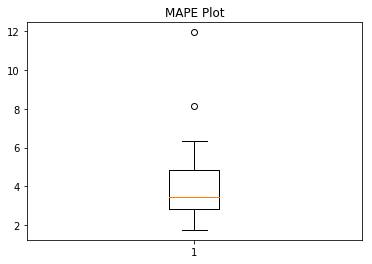

In [163]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

data_to_plot = [task1_48_mape, task1_168_mape, task2_mape,task3_23_mape, task3_22_mape, 
               task3_21_mape, task3_20_mape, task3_19_mape, task3_18_mape, task3_17_mape,
               task3_16_mape, task3_15_mape, task3_14_mape, task3_13_mape, task3_12_mape,
               task3_11_mape, task3_10_mape, task3_9_mape, task3_8_mape, task3_7_mape,
               task3_6_mape, task3_5_mape, task3_4_mape, task3_3_mape, task3_2_mape, task3_1_mape,
               task3_0_mape, task4_hour0_mape, task4_hour1_mape, task4_hour2_mape, task4_hour3_mape,
               task4_hour4_mape, task4_hour5_mape, task4_hour6_mape, task4_hour7_mape, task4_hour8_mape,
               task4_hour9_mape, task4_hour10_mape, task4_hour11_mape, task4_hour12_mape, task4_hour13_mape,
               task4_hour14_mape, task4_hour15_mape, task4_hour16_mape, task4_hour17_mape, task4_hour18_mape,
               task4_hour19_mape, task4_hour20_mape, task4_hour21_mape, task4_hour22_mape, task4_hour23_mape]

fig1, ax1 = plt.subplots()
ax1.set_title('MAPE Plot')
ax1.boxplot(data_to_plot)

When we examine the plot, we observe that most of the models lie between 4.5% and 2.5% MAPE values. In terms of better accuracy, there are several models that achieve the MAPE within the proximity of 2%. However, there are also extreme outliers when we examine the plot as several models have their MAPE values as 8% and 12%. Median value of the models is 3.8%.